<a href="https://colab.research.google.com/github/Bhupinder-2004/CODINGSAMURAI/blob/main/Pridicting_Sales_using_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ASUS Gaming Laptop Price Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv("filpkarttopasusgaminglaptop.csv")

In [3]:
print(" Dataset Info ")
print(df.info())
print("\n Statistical Summary ")
print(df.describe())
print("\n Missing Values ")
print(df.isnull().sum())

 Dataset Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     80 non-null     int64  
 1   product        80 non-null     object 
 2   specification  80 non-null     object 
 3   review         43 non-null     object 
 4   discount       74 non-null     object 
 5   price          80 non-null     object 
 6   rating         43 non-null     float64
 7   offers         34 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 5.1+ KB
None

 Statistical Summary 
       Unnamed: 0     rating
count   80.000000  43.000000
mean    19.500000   4.425581
std     11.616226   0.379908
min      0.000000   3.000000
25%      9.750000   4.400000
50%     19.500000   4.500000
75%     29.250000   4.600000
max     39.000000   5.000000

 Missing Values 
Unnamed: 0        0
product           0
specification     0
review        

In [3]:
# Remove currency symbols and commas if present
df['price'] = df['price'].astype(str).str.replace('₹','').str.replace(',','').astype(float)
df['discount'] = df['discount'].astype(str).str.replace('%','').str.replace(' off','', regex=False)
df['discount'] = pd.to_numeric(df['discount'], errors='coerce')

In [4]:
df = df.dropna(subset=['price', 'discount'])

print("\nCorrelation between Price and Discount:")
print(df[['price', 'discount']].corr())



Correlation between Price and Discount:
             price  discount
price     1.000000  0.113339
discount  0.113339  1.000000


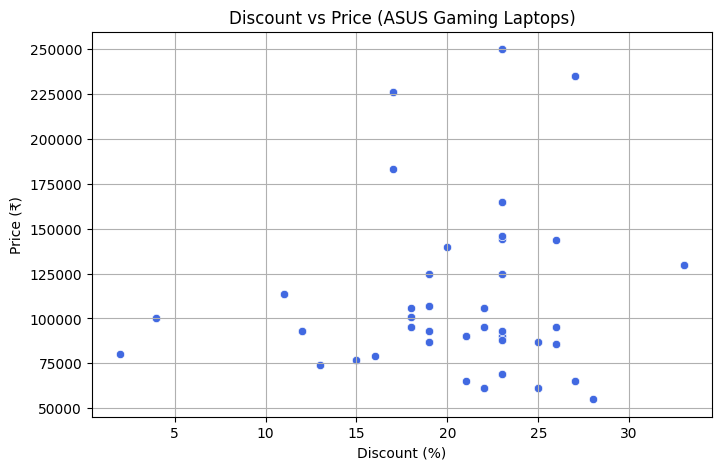

In [5]:

plt.figure(figsize=(8,5))
sns.scatterplot(x='discount', y='price', data=df, color='royalblue')
plt.title("Discount vs Price (ASUS Gaming Laptops)")
plt.xlabel("Discount (%)")
plt.ylabel("Price (₹)")
plt.grid(True)
plt.show()



 Linear Regression Model 
Intercept: 92079.75
Coefficient (Discount): 915.04
Equation: Price = 92079.75 + (915.04 × Discount)

 Model Performance 
R² Score: 0.01
MAE: ₹33078
MSE: ₹2081096068

Data types after cleaning:
Unnamed: 0         int64
product           object
specification     object
review            object
discount         float64
price            float64
rating           float64
offers            object
dtype: object


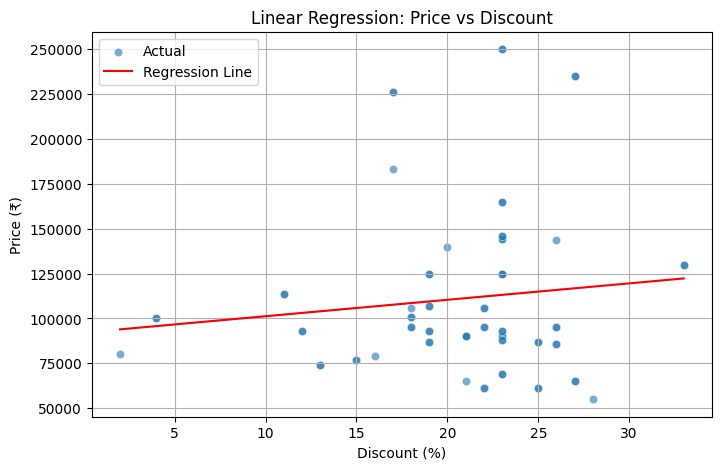

In [6]:
#Linear Regression Model
X = df[['discount']]
y = df['price']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print("\n Linear Regression Model ")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient (Discount): {model.coef_[0]:.2f}")
print(f"Equation: Price = {model.intercept_:.2f} + ({model.coef_[0]:.2f} × Discount)")

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("\n Model Performance ")
print(f"R² Score: {r2:.2f}")
print(f"MAE: ₹{mae:.0f}")
print(f"MSE: ₹{mse:.0f}")

print("\nData types after cleaning:")
print(df.dtypes)

plt.figure(figsize=(8,5))
sns.scatterplot(x='discount', y='price', data=df, label='Actual', alpha=0.6)
sns.lineplot(x='discount', y=y_pred, color='red', label='Regression Line', data=df)
plt.title("Linear Regression: Price vs Discount")
plt.xlabel("Discount (%)")
plt.ylabel("Price (₹)")
plt.legend()
plt.grid(True)
plt.show()

In [7]:

print("\n----- Insights -----")
print("1 Discounts alone do not strongly predict laptop prices (low R²).")
print("2 Possible that higher-priced models have artificially higher 'discounts'.")
print("3 Better features (RAM, GPU, CPU) likely influence price more.")
print("4 Try extracting specs like 'RAM' or 'Processor' from the 'specification' column for deeper insights.")



----- Insights -----
1 Discounts alone do not strongly predict laptop prices (low R²).
2 Possible that higher-priced models have artificially higher 'discounts'.
3 Better features (RAM, GPU, CPU) likely influence price more.
4 Try extracting specs like 'RAM' or 'Processor' from the 'specification' column for deeper insights.
